# Timer Option: 

## Implementation of time-discretization (Andersen's QE) scheme for Heston model

##### Zhou Gongqi, Wu Zhuoqun

## 1. Introduction

A timer option is similar to a plain-vanilla option, except that the expiry is not deterministic. Rather it is specified as the first time when the accumulated realized variance exceeds a given budget. See Hawkins and Krol (2008), Carr and Lee (2010), and Lee (2012) for some insights on why such a product can be attractive to investors. Interestingly, timer options were studied many years ago by Neuberger (1990) and Bick (1995) when such security did not even exist in the market place. Sawyer (2008) also reported that Societ´ e G´ en´ erale Corporate and Investment Banking started to sell other timer-style options such as “timer out-performance options” and “timer swaps.”

## 2. Pricing Timer Options

### 2.1. The Model Setup: Heston Model

consider a general time-homogenous stochastic volatility framework. Under the risk-neutral measure, the stock process $S_u$ and instantaneous variance process $V_u$ evolve as:

$$d{S_u}=\left(r-\delta \right){S_u}\:du+\sqrt{V_u}\:{S_u}d{W_u}^S\tag1$$

$$d{V_u}=a\left({V_u}\right)du+\eta b\left({V_u}\right)d{W_u}^V\tag2$$

Here we assume that the interest rate $r$ and dividend rate $δ$ are both constants, and the two Brownian motions ${W_u}^S$ and ${V_u}^S$ are correlated with constant coefficient $ρ$. The functions $a(V)$ and $b(V)$ are assumed to be such that the process Vu has a domain (0,∞), and does not explode to either 0 or ∞. 

Now define the accumulated variance process to be:

$$\xi_u =\xi +\int _0^u{V_u}ds\:\tag3$$

Here $\xi_0$ = $\xi$ is the accumulated variance at time 0. Let $\tau ^B$ be the random time remaining for a pre-specified variance budget B > 0 to be exceeded. That is,

$$\tau ^B≡inf\left\{u>0:\xi_u =B\right\}=inf\left\{u>0:\int _0^u{V_s}ds=B-\xi \:\right\}\tag4$$

A finite-maturity timer call option has a mandated maximum maturity T. The option matures when the variance budget is exhausted, but no later than the prescribed maximum maturity T.That is, the finite-maturity timer option is exercisable at the random time $\tau$, where

$$\tau \:=\tau ^B\wedge T≡min\left(\tau \:^B,T\right)\tag5$$

When the option is exercised at random time $\tau$, the buyer of the option receives a payoff $({S_{\tau}} − K)$ where K is the strike price specified in the contract. Similarly, a timer put option pays $(K −{S_{\tau}})$ when exercised at time $\tau$. A perpetual timer option is similar to a finite maturity timer option except that there is no contractual maximum maturity. So a perpetual timer option is exercisable at exactly the random time ${\tau}^B$.

In practice, the realized variance up to day N is computed using the daily closing prices as follows:

$$\sum _{i=1}^{\infty }\left[log\left(\frac{S_{t_i}}{S_{t_i-1}}\right)\right]^2.\tag6$$

This daily accumulated variance is used in the timer option contract to determine the random exercise time. The approximation of using $\xi_u$ instead of the above discrete sum is standard in the variance derivative pricing literature. The discretization bias induced is usually very small with daily accumulation. The variance budget B is usually quoted according to a target expiration $T_{target}$ as $B=\sigma_imp ^2T_{target}$, where $\sigma_{imp}$ is the implied volatility for a European option on the underlying with maturity $T_{target}$ and the same strike K. On contract initiation for a finite-maturity timer option, the maximum maturity T is usually much larger than $T_{target}$. In the term sheets we have seen, it can be as large as six times the target expiration. Assume that the current time is 0. For notational simplicity, we will assume that $\xi =0$ so that B should be interpreted as the remaining variance budget $B-\xi $. Let the current stock price be $S_0$ and the current instantaneous variance be $V_0$. Let $C_{fin}$ denote the timer call option price with a remaining maximum maturity T > 0 and a remaining variance budget B > 0. Similarly for $P_{fin}$. By risk-neutral pricing, we have

$$C_{fin}=E_0\left[e^{-r\tau }\left(S_{\tau}-K\right)^+\right]\tag7$$

For the put, we have $P_{fin}=E_0\left[e^{-r\tau }\left(S_{\tau}-K\right)^+\right]$. The perpetual option prices are given by

$$C_{perp}=E_0\left[e^{-r{\tau^B}\:}\left(S_{\tau^B}-K\right)^+\right]，P_{perp}=E_0\left[e^{-r{\tau^B}\:}\left(K-S_{\tau^B}\right)^+\right]\tag8$$

If one has the joint distribution of ($\tau$, $S_{\tau}$) or ($\tau^B$, $S_{\tau^B}$), the pricing of timer option is a simple two-dimensional integration. In practice, such a joint distribution is often not readily available. This makes the pricing of timer options a difficult problem. 

In Heston model,(2) can be changed into: 

$$dV_t=\kappa \left(\theta -V_t\right)dt+\eta \sqrt{V_t}dW^V\tag9$$

### 2.2. Time Discretization: Quadratic Exponential Scheme

In the CIR model (1985, Cox et al),${V_u}$ can reach 0: the Feller condition $(2\kappa \theta >\eta ^2)$ is violated in typical Heston parameters.The summary of Anderson QE is as follows:

$\bullet$ If $V_t$ is close to 0:

$$V_{t+h}=\begin{cases}0&if\:\:0\le U\le p\\ \frac{1}{\beta }log\left(\frac{1-p}{1-U}\right)&if\:p<U\le 1\end{cases}for\:uniform\:RV\:U\tag{10}$$

$\bullet$ If $V_t$ is away from 0:

$$V_t=a\left(b+W^V\right)^2\:for\:{W^V}\sim\:N\left(0,1\right)\tag{11}$$

$\bullet$ The coefficients $(a,b,\beta$, and $p)$ are determined to match:

$$m=E\left(V_{t+h}\mid V_t\right)=\theta +\left(V_t-\theta \right)e^{-\kappa h}\tag{12} $$

$$s^2=Var\left(V_{t+h}\mid V_t\right)=\frac{\eta ^2}{\kappa }\left(1-e^{-\kappa h}\right)\left(V_0e^{-\kappa h}+\frac{\theta }{2}\left(1-e^{-\kappa h}\right)\right)\tag{13}$$

$\bullet$ Trapezoidal rule for the integreted variance:

$$I_{t,t+h}=\left(V_t+V_{t+h}\right)\frac{h}{2}\tag{14}$$

$$I_{0,T}=\left(V_0+2V_h+...+2V_{T-h}+V_T\right)\frac{h}{2}\tag{15}$$

## 3. Simulation 

Use Heston MC with Anderson QE to get price several options mentioned in the paper by Li & Mercurio (2014). We use their results of approximation as benchmarks. In this part, we will try mc method as well as conditional mc method.

In [12]:
%load_ext autoreload
%autoreload 2

In [13]:
import pyfeng as pf
import timer_condmc # the timer option model
import numpy as np
import pandas as pd

n_path = 200000
dt = 1 / 250

sigma, mr, spot, theta, intr = 0.087, 2, 100, 0.09, 0.015
vol_budget = 0.087  # Li M, Mercurio F (2015). Budget level is constant = 0.087

In [14]:
vov = np.array([0.125, 0.25, 0.375])
texp = np.array([0.5, 1.0, 1.5, 2.0, 10.0])
strike = np.array([90, 100, 110])

In [15]:
# Set an initial array for zero-corr condition
call_price_zero_corr = put_price_zero_corr = np.zeros([5,3,3]) #第一个5是T/texp的取值维度，第二个3是K/strike的取值维度，第三个3是vov的取值维度
# set an array of 3 dimensions: 5 * 3 * 3

In [16]:
# Set an initial array for nonzero-corr condition
call_price_nonzero_corr = put_price_nonzero_corr = np.zeros([3,2,3,3]) #第一个5是T/texp的取值维度，第二个3是K/strike的取值维度，第三个3是vov的取值维度
# set an array of 3 dimensions: 3 * 2 * 3 * 3

### 3.1. Zero Correlation ρ

As for call option:

In [6]:
rho = 0
cp = 1 # for call option

In [ ]:
# for i in range(len(texp)):
#     print('T = %s:' % texp[i])
#     for j in range(len(strike)):
#         for k in range(len(vov)):
#             m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=rho, theta=theta, intr=intr)
#             m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
#             call_price_zero_corr[i][j][k] = timer.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=cp)
#         print(call_price_zero_corr[i][j][:])
#     # df_call_zero=pd.DataFrame(call_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η1=0.125','η2=0.250','η3=0.375'])
#     # print(df_call_zero)
#     print('\n')

In [26]:
### For simple mc method,call option pricing:

for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(strike)):
        for k in range(len(vov)):
            m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=0, theta=theta, intr=intr)
            m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
            call_price_zero_corr[i][j][k] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=1, condmc=0)
        # print(call_price_zero_corr[i][j][:])
    df_call_zero=pd.DataFrame(call_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η=0.125','0.250','0.375'])
    print(df_call_zero)
    print('\n')

T = 0.5:
          η=0.125      0.250      0.375
K1=90   14.341601  14.316911  14.269992
K2=100   8.676474   8.633668   8.554525
K3=110   4.885439   4.852417   4.790883


T = 1.0:
          η=0.125      0.250      0.375
K1=90   17.351991  17.065325  16.760355
K2=100  12.088967  11.754266  11.395724
K3=110   8.172385   7.845616   7.492126


T = 1.5:
          η=0.125      0.250      0.375
K1=90   17.625675  17.667184  17.576131
K2=100  12.387818  12.417844  12.300753
K3=110   8.463572   8.487829   8.361705


T = 2.0:
          η=0.125      0.250      0.375
K1=90   17.625988  17.697626  17.750436
K2=100  12.388078  12.451589  12.491661
K3=110   8.463825   8.522222   8.547762


T = 10.0:
          η=0.125      0.250      0.375
K1=90   17.625988  17.698397  17.766744
K2=100  12.388078  12.452382  12.510047
K3=110   8.463825   8.523090   8.565506




In [7]:
### For conditional mc method,call option pricing:


for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(strike)):
        for k in range(len(vov)):
            m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=rho, theta=theta, intr=intr)
            m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
            call_price_zero_corr[i][j][k] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=1, condmc=1)
        # print(call_price_zero_corr[i][j][:])
    df_call_zero=pd.DataFrame(call_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η=0.125','0.250','0.375'])
    print(df_call_zero)
    print('\n')

T = 0.5:
          η=0.125      0.250      0.375
K1=90   14.350560  14.323873  14.274151
K2=100   8.690052   8.643882   8.560615
K3=110   4.890773   4.854363   4.787818


T = 1.0:
          η=0.125      0.250      0.375
K1=90   17.372211  17.067404  16.761769
K2=100  12.111938  11.763286  11.405319
K3=110   8.200028   7.854535   7.501222


T = 1.5:
          η=0.125      0.250      0.375
K1=90   17.639731  17.642532  17.550619
K2=100  12.408034  12.402194  12.286354
K3=110   8.491828   8.480625   8.358742


T = 2.0:
          η=0.125      0.250      0.375
K1=90   17.639816  17.676421  17.713613
K2=100  12.408128  12.439620  12.467022
K3=110   8.491921   8.517527   8.536182


T = 10.0:
          η=0.125      0.250      0.375
K1=90   17.639816  17.676888  17.733956
K2=100  12.408128  12.440134  12.489489
K3=110   8.491921   8.518037   8.558378




In [ ]:
# for i in range(len(texp)):
#     print('T = %s:' % texp[i])
#     for j in range(len(strike)):
#         for k in range(len(vov)):
#             m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=rho, theta=theta, intr=intr)
#             m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
#             call_price_zero_corr[i][j][k] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=1, condmc=0)
#         # print(call_price_zero_corr[i][j][:])
#     df_call_zero=pd.DataFrame(call_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η=0.125','0.250','0.375'])
#     print(df_call_zero)
#     print('\n')

The paper's results:

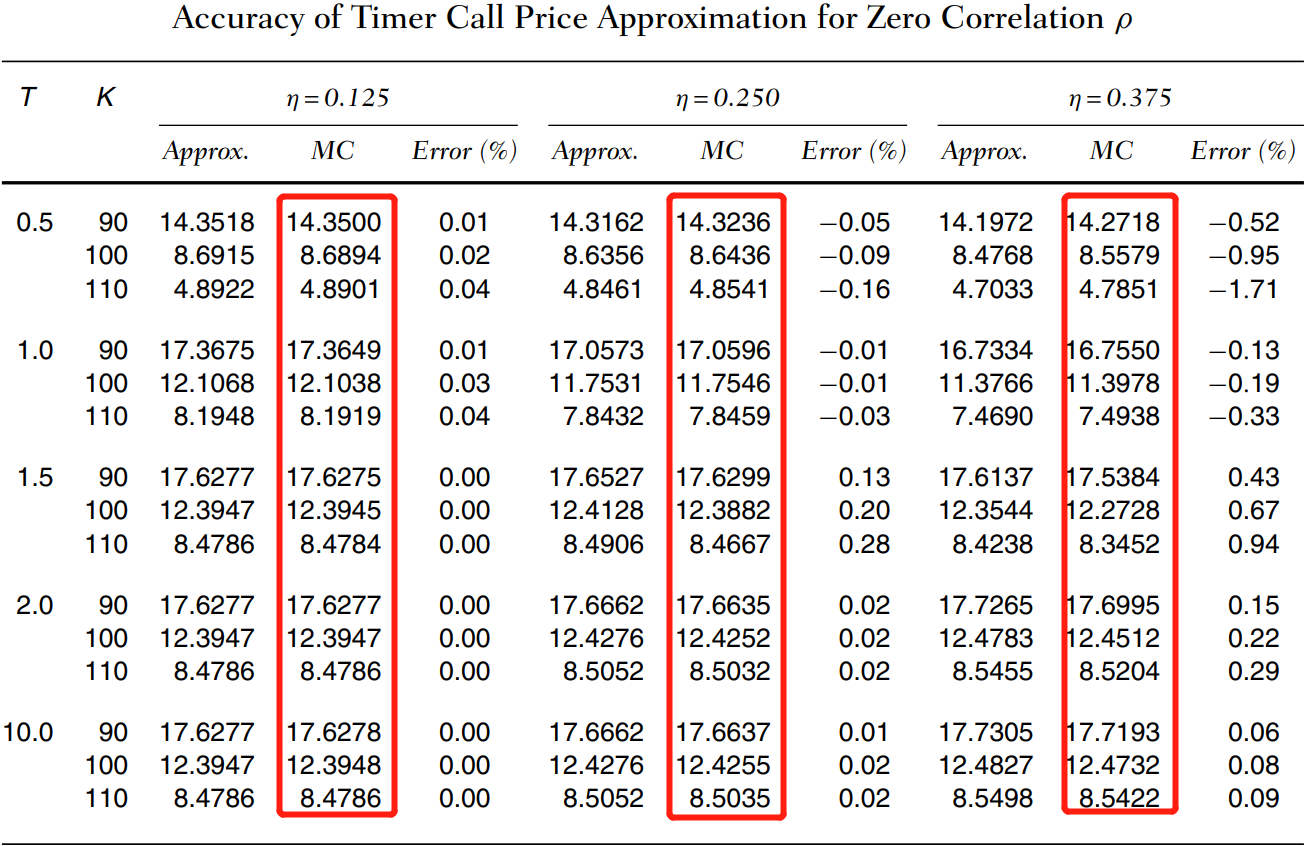

As for put option:

In [8]:
### For simple mc method,put option pricing:

for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(strike)):
        for k in range(len(vov)):
            m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=0, theta=theta, intr=intr)
            m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
            put_price_zero_corr[i][j][k] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=-1, condmc=0)
        # print(call_price_zero_corr[i][j][:])
    df_put_zero=pd.DataFrame(put_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η=0.125','0.250','0.375'])
    print(df_put_zero)
    print('\n')

T = 0.5:
          η=0.125      0.250      0.375
K1=90    3.670498   3.643643   3.594205
K2=100   7.930652   7.885684   7.804100
K3=110  14.064897  14.029715  13.965821


T = 1.0:
          η=0.125      0.250      0.375
K1=90    6.090343   5.816525   5.539276
K2=100  10.686030  10.368600  10.040901
K3=110  16.628158  16.323082  16.003559


T = 1.5:
          η=0.125      0.250      0.375
K1=90    6.285951   6.238567   6.114059
K2=100  10.899436  10.835242  10.680266
K3=110  16.826531  16.751240  16.582803


T = 2.0:
          η=0.125      0.250      0.375
K1=90    6.286178   6.259191   6.229599
K2=100  10.899607  10.857972  10.806446
K3=110  16.826693  16.773422  16.698170


T = 10.0:
          η=0.125      0.250      0.375
K1=90    6.286178   6.259212   6.245490
K2=100  10.899607  10.857996  10.823572
K3=110  16.826693  16.773504  16.713810




In [17]:
### For conditional mc method,put option pricing:


for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(strike)):
        for k in range(len(vov)):
            m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=0, theta=theta, intr=intr)
            m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
            call_price_zero_corr[i][j][k] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=-1, condmc=1)
        # print(call_price_zero_corr[i][j][:])
    df_put_zero=pd.DataFrame(put_price_zero_corr[i][:][:],index=['K1=90','K2=100','K3=110'],columns=['η=0.125','0.250','0.375'])
    print(df_put_zero)
    print('\n')

T = 0.5:
          η=0.125      0.250      0.375
K1=90    3.678085   3.651419   3.602413
K2=100   7.942857   7.896711   7.814239
K3=110  14.068859  14.032475  13.966804


T = 1.0:
          η=0.125      0.250      0.375
K1=90    6.100607   5.835602   5.558076
K2=100  10.699044  10.394617  10.067881
K3=110  16.645845  16.349000  16.030040


T = 1.5:
          η=0.125      0.250      0.375
K1=90    6.301805   6.256661   6.124883
K2=100  10.921449  10.862338  10.702203
K3=110  16.856585  16.786783  16.616176


T = 2.0:
          η=0.125      0.250      0.375
K1=90    6.301865   6.279778   6.234215
K2=100  10.921516  10.887793  10.823247
K3=110  16.856648  16.810518  16.728029


T = 10.0:
          η=0.125      0.250      0.375
K1=90    6.301865   6.280077   6.246970
K2=100  10.921516  10.888122  10.837282
K3=110  16.856648  16.810823  16.740951




In [ ]:
# cp = -1 # for put option
# # The same coding as above, in order to compare the results in our simulation and those of paper, we seperate call/put(cp=1/-1).
# for i in range(len(texp)):
#     print('T = %s:' % texp[i])
#     for j in range(len(strike)):
#         for k in range(len(vov)):
#             m = pf.HestonMcAndersen2008(sigma, vov=vov[k], mr=mr, rho=rho, theta=theta, intr=intr)
#             m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
#             put_price_zero_corr[i][j][k] = timer.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[j], texp=texp[i], cp=cp)
#         print(put_price_zero_corr[i][j][:])
#     print('\n')

The paper's results:

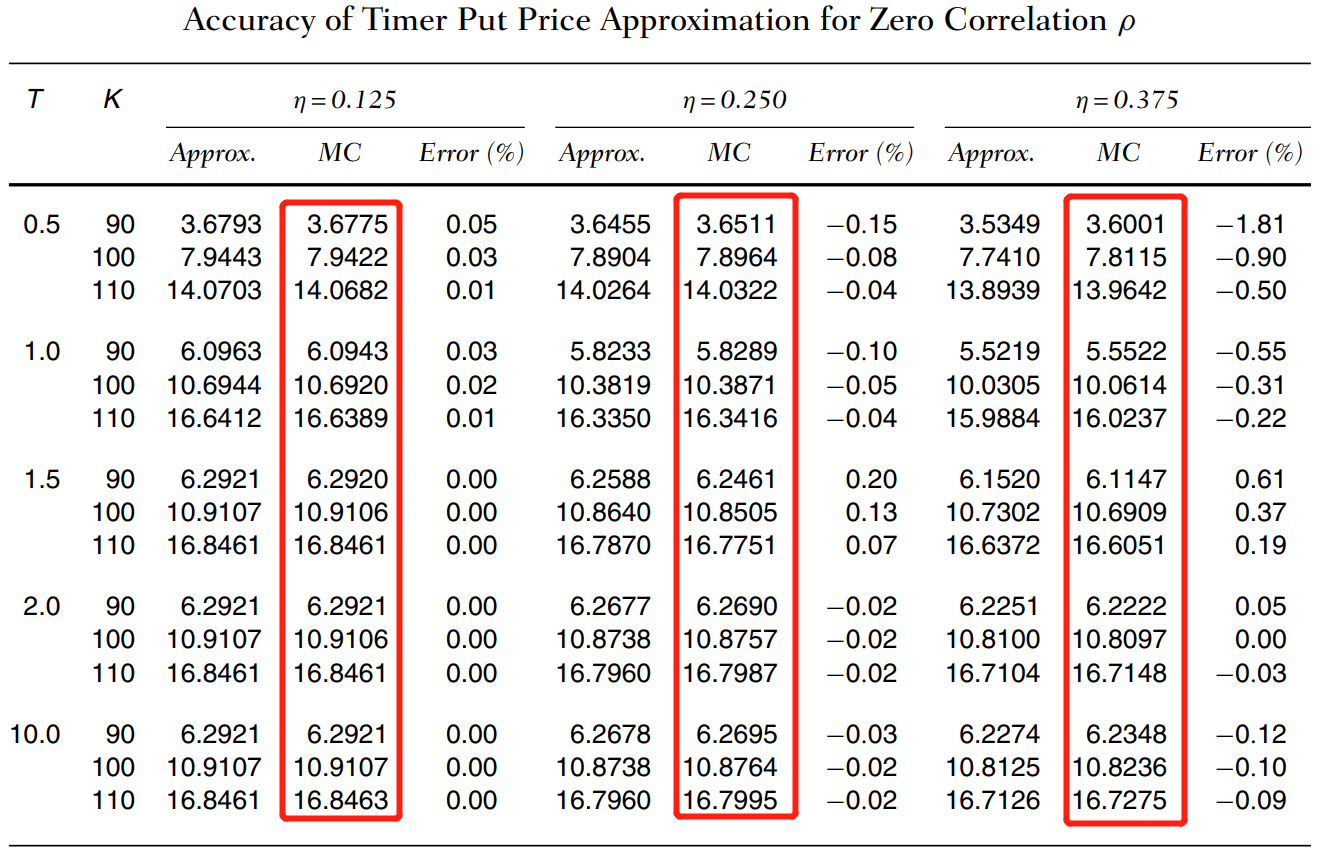

### 3.2. Nonzero Correlation ρ

In [20]:
vov = np.array([0.125, 0.25, 0.375])
texp = np.array([0.5, 1.0, 1.5])
strike = np.array([90, 100, 110])
rho = np.array([-0.5,0.5])

As for call option:

In [29]:
### For simple mc method,call option pricing:

cp = 1
for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(rho)):
        print('ρ= %s:' % rho[j])
        for k in range(len(strike)):
            for l in range(len(vov)):
                m = pf.HestonMcAndersen2008(sigma, vov=vov[l], mr=mr, rho=rho[j], theta=theta, intr=intr)
                m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
                
                call_price_nonzero_corr[i][j][k][l] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[k], texp=texp[i], cp=1, condmc=0)
        df_call_nonzero=pd.DataFrame(call_price_nonzero_corr[i][j][:][:],index=['K1=90','K2=100','K3=110'],columns=['η= 0.125','0.250','0.375'])
        print(df_call_nonzero)
           # print(call_price_nonzero_corr[i][j][k][:])
        
        print('\n')

T = 0.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   14.400640  14.448647  14.471310
K2=100   8.643661   8.583574   8.490922
K3=110   4.748961   4.595810   4.417685


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   14.290134  14.176461  14.039950
K2=100   8.729015   8.698045   8.631183
K3=110   5.025455   5.099981   5.140220


T = 1.0:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   17.421616  17.210784  16.967747
K2=100  12.115654  11.798172  11.451086
K3=110   8.143452   7.752494   7.338655


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   17.336155  17.023555  16.678504
K2=100  12.132081  11.845234  11.526065
K3=110   8.265084   8.033783   7.783670


T = 1.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   17.652407  17.738361  17.689558
K2=100  12.416303  12.487417  12.396645
K3=110   8.498135   8.552624   8.420044


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   17.602626  17.623735  17.533909
K2=100  12.362346  12.382410  12

In [21]:
### For conditional mc method,call option pricing:

for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(rho)):
        print('ρ= %s:' % rho[j])
        for k in range(len(strike)):
            for l in range(len(vov)):
                m = pf.HestonMcAndersen2008(sigma, vov=vov[l], mr=mr, rho=rho[j], theta=theta, intr=intr)
                m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
                
                call_price_nonzero_corr[i][j][k][l] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[k], texp=texp[i], cp=1, condmc=1)
        df_call_nonzero=pd.DataFrame(call_price_nonzero_corr[i][j][:][:],index=['K1=90','K2=100','K3=110'],columns=['η= 0.125','0.250','0.375'])
        print(df_call_nonzero)
           # print(call_price_nonzero_corr[i][j][k][:])
        
        print('\n')

T = 0.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   14.430427  14.477360  14.498597
K2=100   8.675718   8.613280   8.518191
K3=110   4.776553   4.621206   4.439429


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   14.270384  14.156675  14.018532
K2=100   8.708196   8.676826   8.607493
K3=110   5.005920   5.078849   5.115673


T = 1.0:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   17.451697  17.226713  16.994327
K2=100  12.147149  11.824060  11.483913
K3=110   8.175282   7.782458   7.370330


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   17.347261  17.006109  16.650425
K2=100  12.143210  11.828999  11.496182
K3=110   8.277443   8.024722   7.758646


T = 1.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90   17.672852  17.726803  17.700597
K2=100  12.445407  12.489762  12.417062
K3=110   8.529263   8.557883   8.436742


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90   17.611216  17.593757  17.486178
K2=100  12.376243  12.358288  12

The paper's results:

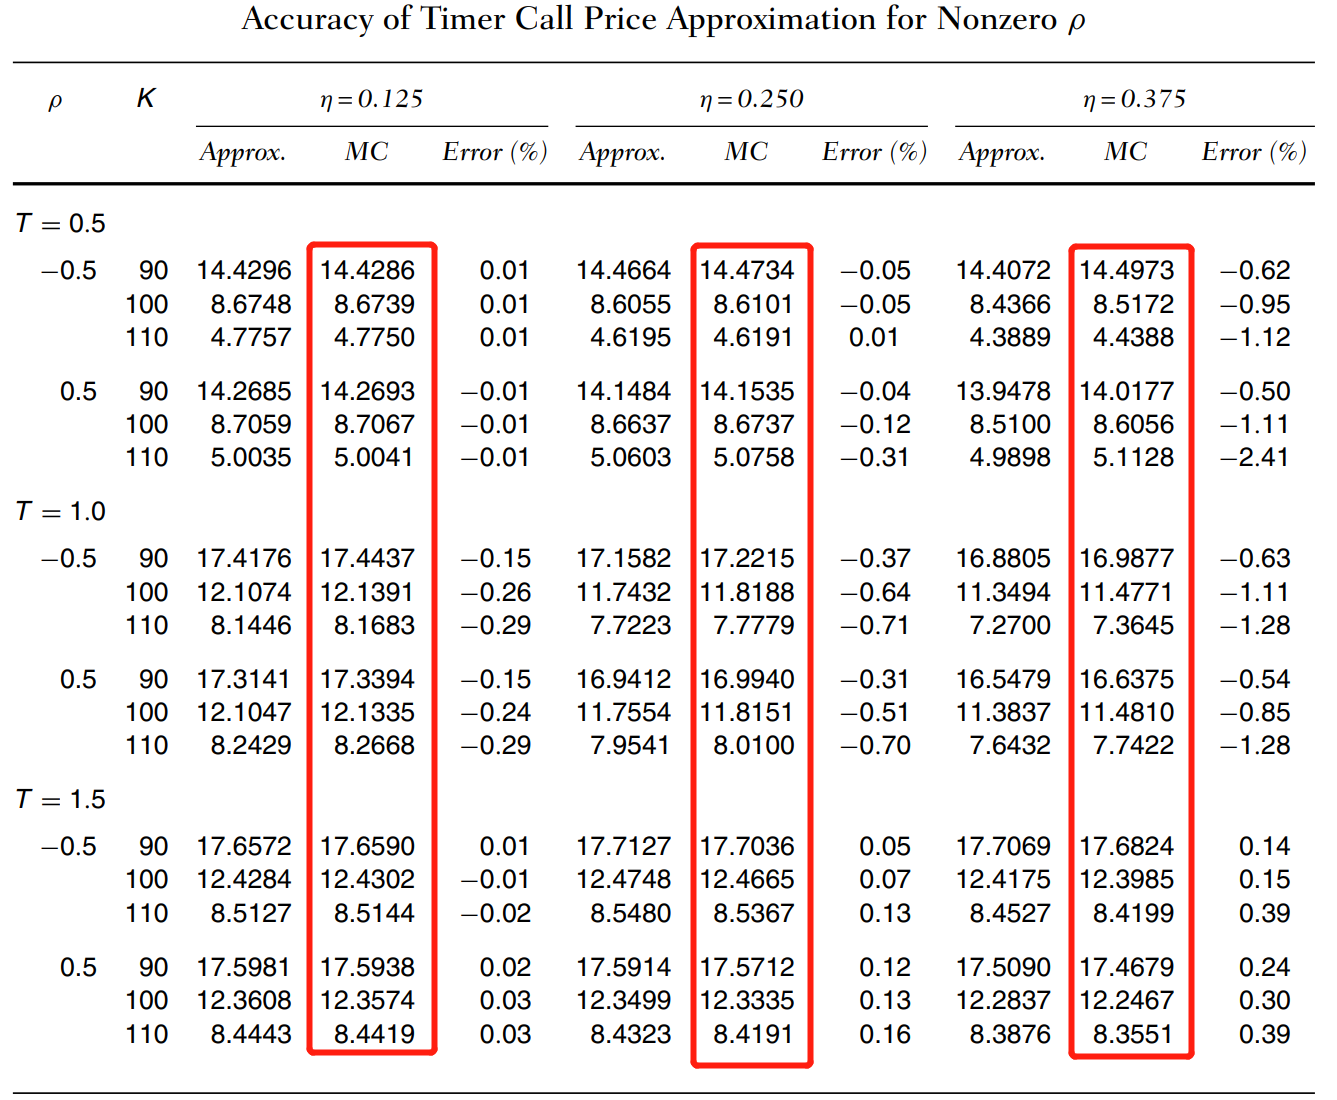

As for put option:

In [30]:
### For simple mc method,put option pricing:

cp = -1
for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(rho)):
        print('ρ= %s:' % rho[j])
        for k in range(len(strike)):
            for l in range(len(vov)):
                m = pf.HestonMcAndersen2008(sigma, vov=vov[l], mr=mr, rho=rho[j], theta=theta, intr=intr)
                m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
                
                put_price_nonzero_corr[i][j][k][l] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[k], texp=texp[i], cp=-1, condmc=0)
        df_put_nonzero=pd.DataFrame(put_price_nonzero_corr[i][j][:][:],index=['K1=90','K2=100','K3=110'],columns=['η= 0.125','0.250','0.375'])
        print(df_put_nonzero)
           # print(call_price_nonzero_corr[i][j][k][:])
        
        print('\n')

T = 0.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    3.738877   3.785198   3.805544
K2=100   7.907178   7.845409   7.750518
K3=110  13.937758  13.782927  13.602643


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    3.606730   3.491239   3.353028
K2=100   7.970891   7.938106   7.869623
K3=110  14.192612  14.265325  14.304022


T = 1.0:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    6.161512   5.972924   5.763852
K2=100  10.714261  10.423445  10.113448
K3=110  16.600769  16.240900  15.867273


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    6.064555   5.762263   5.437831
K2=100  10.719191  10.447075  10.151649
K3=110  16.710905  16.498757  16.275511


T = 1.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    6.313042   6.310533   6.242688
K2=100  10.928280  10.905604  10.791360
K3=110  16.861453  16.816825  16.656344


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    6.256787   6.198163   6.060991
K2=100  10.867849  10.802853  10

In [22]:
### For conditional mc method,put option pricing:

cp = -1
for i in range(len(texp)):
    print('T = %s:' % texp[i])
    for j in range(len(rho)):
        print('ρ= %s:' % rho[j])
        for k in range(len(strike)):
            for l in range(len(vov)):
                m = pf.HestonMcAndersen2008(sigma, vov=vov[l], mr=mr, rho=rho[j], theta=theta, intr=intr)
                m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)
                
                put_price_nonzero_corr[i][j][k][l] = timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike[k], texp=texp[i], cp=-1, condmc=1)
        df_put_nonzero=pd.DataFrame(put_price_nonzero_corr[i][j][:][:],index=['K1=90','K2=100','K3=110'],columns=['η= 0.125','0.250','0.375'])
        print(df_put_nonzero)
           # print(call_price_nonzero_corr[i][j][k][:])
        
        print('\n')

T = 0.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    3.757702   3.805110   3.826614
K2=100   7.928273   7.866313   7.771570
K3=110  13.954388  13.799522  13.618170


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    3.595993   3.481731   3.345157
K2=100   7.959085   7.927165   7.859481
K3=110  14.182089  14.254471  14.293022


T = 1.0:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    6.180068   5.996657   5.794978
K2=100  10.734230  10.457137  10.150820
K3=110  16.621073  16.278668  15.903493


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    6.074233   5.769057   5.439100
K2=100  10.728893  10.455079  10.151113
K3=110  16.721837  16.513936  16.279833


T = 1.5:
ρ= -0.5:
         η= 0.125      0.250      0.375
K1=90    6.332572   6.332231   6.272563
K2=100  10.956468  10.941205  10.830612
K3=110  16.891666  16.855341  16.691877


ρ= 0.5:
         η= 0.125      0.250      0.375
K1=90    6.273284   6.209808   6.058428
K2=100  10.889651  10.820353  10

The paper's results:

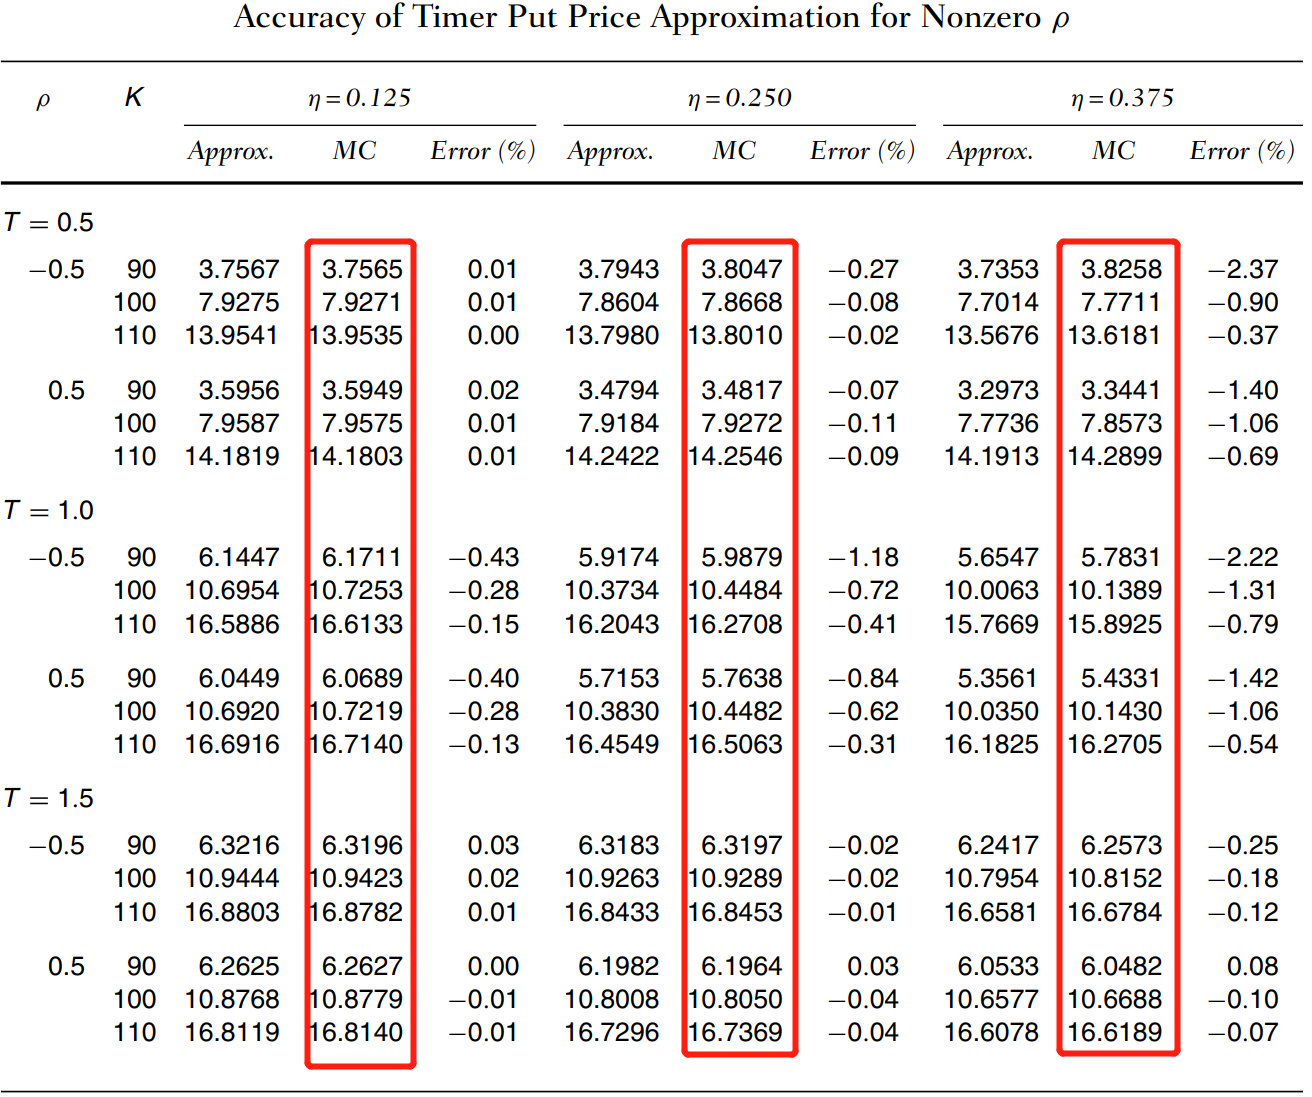

### 3.3. A Simple Case for Heston Model

A simple case of timer option is when $T>>1$, $\rho$ =0 and interest rate=0, the timer option is same as taht of the Black- Scholes option price with volatility $\sigma_{BS}=\sigma_B$ even though the expiry is not always T.

We use same parameters as the paper.

In [ ]:
n_path = 200000
dt = 1 / 100

sigma, mr, spot, theta, intr = 0.09, 2, 100, 0.09, 0.00
vol_budget = 0.09
vov = 0.125
rho = 0
strike = 100
# for texp in np.linspace(0.1, 5, 30):
texp = 4

m = pf.HestonMcAndersen2008(sigma, vov=vov, mr=mr, rho=rho, theta=theta, intr=intr)
m.set_num_params(n_path=n_path, dt=dt, rn_seed=123456)

cp = 1  # Timer option--call option
m2 = pf.Bsm(sigma=np.sqrt(vol_budget/texp), intr=intr)
price_bsm = m2.price(strike=strike, spot=spot, texp=texp)
print("BSM_price =", price_bsm)

for i in range(10):
    print("vov(η)=", vov, "texp(T)=", texp, "rho(ρ)=", rho, "strike(K)=", strike, ": ", "  Timer Call Option =",\
          timer_condmc.timeroption(vol_budget, model=m).price(spot=spot, strike=strike, texp=texp, cp=cp))